# 多层感知机

线性回归和softmax分类是单层神经网络，而深度学习主要关注多层模型。
本节将以多层感知机（MLP）为例，介绍多层神经网络的概念。

## 隐藏层

多层感知机在单层神经网络的基础上引入一个到多个隐藏层。隐藏层位于输入层和输出层之间。

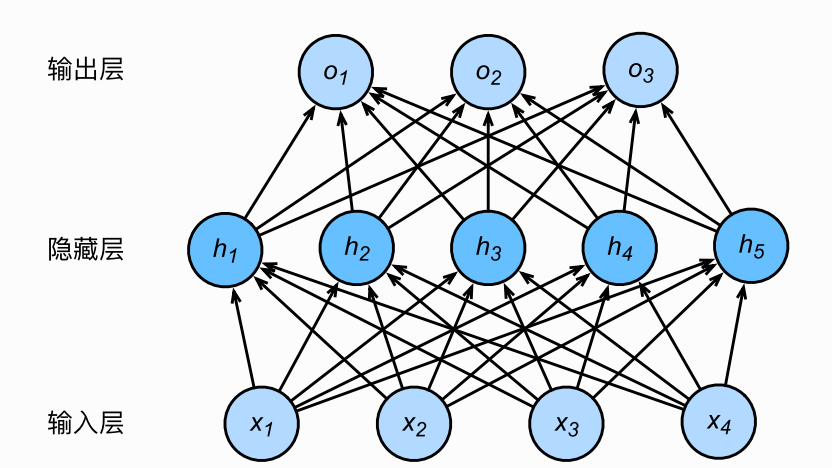

上图展示了一个多层感知机的神经网络图，它有一个隐藏层，该层中有5个隐藏单元，输入和输出个数分别是4和3，中间的隐藏层中包含了5个隐藏单元 $h1,h2,h3,h4,h5$。由于输入层不涉及计算，上图中的多层感知机的层数为2。隐藏层中的神经元和输⼊层中各个输⼊完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

具体来说，给定一个小批量样本 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为 $n$，输入个数为 $d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为 $h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为 $\boldsymbol{H}$，有 $\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为 $\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和$\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为 $\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出 $\boldsymbol{O} \in \mathbb{R}^{n \times q}$ 的计算为：

$$
\begin{cases}
\boldsymbol{H} = \boldsymbol{X}\boldsymbol{W}_h + \boldsymbol{b}_h, \\
\boldsymbol{O} = \boldsymbol{H}\boldsymbol{W}_o + \boldsymbol{b}_o,
\end{cases}
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到：

$$
\boldsymbol{O} = (\boldsymbol{X}\boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X}\boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h\boldsymbol{W}_o + \boldsymbol{b}_o. \tag{20}
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为 $\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为 $\boldsymbol{b}_h\boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。

## 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），⽽多个仿射变换的叠加仍然是⼀个仿射变换。解决问题的⼀个⽅法是引⼊⾮线性变换，例如对隐藏变量使⽤按元素运算的⾮线性函数进⾏变换，然后再作为下⼀个全连接层的输⼊。这个⾮线性函数被称为激活函数（activationfunction）。下⾯我们介绍⼏个常⽤的激活函数。


### ReLU函数

ReLU 函数提供了一个很简单的非线性变换。给定元素 $x$，该函数定义为 $ReLU(x) = \max (x,0)$

只保留正数元素，并将负数元素清零。

In [8]:
%matplotlib inline
import torch
import numpy
import matplotlib.pyplot as plt
import sys

def xyplot(x_vals,y_vals,name):
    plt.figure(figsize=(5,2.5))
    plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())# 取消追踪
    plt.xlabel('x')
    plt.ylabel(name+'(x)')

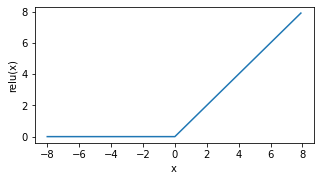

In [16]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y = x.relu()
xyplot(x,y,'relu')

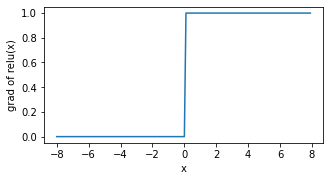

In [17]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：

$$
\text{sigmoid}(x) = \dfrac{1}{1 + \exp(-x)}
$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

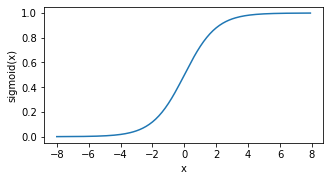

In [18]:
y = x.sigmoid()
xyplot(x,y,'sigmoid')

依据链式法则，sigmoid函数的导数  

$$
\text{sigmoid}'(x) = \text{sigmoid}(x) \left(1 - \text{sigmoid}(x)\right).
$$  

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

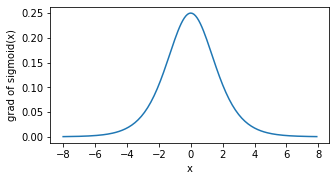

In [19]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

### tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：  

$$
\tanh(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.
$$  

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

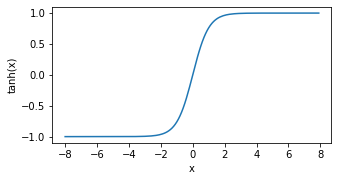

In [20]:
y = x.tanh()
xyplot(x,y,'tanh')

依据链式法则，tanh函数的导数  

$$
\tanh'(x) = 1 - \tanh^2(x).
$$  

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

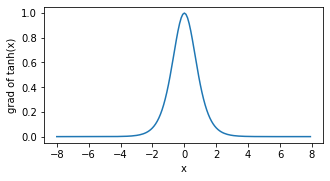

In [21]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of tanh')

## 多层感知机

多层感知机就是至少有一个隐藏层是由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数合各隐藏层中隐藏单元个数都是超参数。多层感知机按以下方式计算输出。

$$
\boldsymbol{H} = \phi(\boldsymbol{X}\boldsymbol{W}_h + \boldsymbol{b}_h),
$$  

$$
\boldsymbol{O} = \boldsymbol{H}\boldsymbol{W}_o + \boldsymbol{b}_o,
$$  

其中 $\phi$ 表示激活函数。在分类问题中，我们可以对输出 $\boldsymbol{O}$ 做softmax运算，并使用softmax回归中的交叉熵损失函数。在回归问题中，我们将输出层的输出个数设为1，并将输出 $\boldsymbol{O}$ 直接提供给线性回归中使用的平方损失函数。

## 从零开始的多层感知机代码实现



In [27]:
import torch
import numpy as np
import sys 
import torchvision.datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [28]:
batch_size = 256
mnist_train =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)

In [30]:
num_inputs,num_outputs,num_hiddens = 784,10,256 # 隐藏层超参数个数为256，第一层穿出的数据不是10个类别而是隐藏层的单元数
W1 = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hiddens)),dtype=torch.float)
b1 = torch.zeros(num_hiddens,dtype=torch.float)
W2 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)),dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad = True


In [31]:
def relu(X):
    return torch.max(input=X,other=torch.tensor(0.0)) #返回0和X中的最大值

In [33]:
def net(X):
    X = X.view((-1,num_inputs))
    H = relu(torch.mm(X,W1)+b1)
    return torch.mm(H,W2) +b2

In [34]:
loss = torch.nn.CrossEntropyLoss()

In [ ]:
lr = 100.0
num_epochs =5

def evalua_accuracy(data_iter,net):
    acc_sum,n = 0.0,0
    for X,y in data_iter:
        acc_sum += (net(X).argmax(dim=1)==y).float().sum().item() #item() 可以提取出这个元素的值，得到一个纯 Python 类型的数值，而不是张量对象。
        n+=y.shape[0]
    return acc_sum/n

def train_ch3(net, train_iter, test_iter, loss, num_epochs,
batch_size,
    params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0

        for X, y in train_iter: # 每个X 和 y 都是batch个打乱后的样本
            y_hat = net(X)
            l = loss(y_hat, y).sum()
 # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
 # 梯度优化
            l.backward()
            if optimizer is None:
                for param in params:
                    param.data -= lr * param.grad / batch_size  
                    param.grad.data.zero_()
            else:
                optimizer.step() 
 
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) ==y).sum().item()
            n += y.shape[0]
        test_acc = evalua_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_l_sum / n, train_acc_sum / n,test_acc))



In [42]:
train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch 1, loss 0.0014, train acc 0.871, test acc 0.826
epoch 2, loss 0.0013, train acc 0.876, test acc 0.856
epoch 3, loss 0.0013, train acc 0.881, test acc 0.862
epoch 4, loss 0.0012, train acc 0.882, test acc 0.863
epoch 5, loss 0.0012, train acc 0.887, test acc 0.850


## 多层感知机的简洁实现

In [43]:
import torch
from torch import nn
from torch.nn import init
import numpy as np

In [44]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1) # 将X 转化成 batch *1*28*28

In [ ]:
num_inputs,num_outputs,num_hiddens = 784,10,256

net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs),
)

for params in net.parameters():
    init.normal_(param,mean=0,std=0.01) # 由于b的影响不大，直接全部标准化

In [53]:
batch_size = 256
mnist_train =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(),lr = 0.5)

num_epochs = 5
train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)

epoch 1, loss 0.0008, train acc 0.922, test acc 0.846
epoch 2, loss 0.0008, train acc 0.924, test acc 0.879
epoch 3, loss 0.0008, train acc 0.924, test acc 0.871
epoch 4, loss 0.0008, train acc 0.924, test acc 0.877
epoch 5, loss 0.0008, train acc 0.926, test acc 0.882


## 小结

通过`Pytorch` 可以更简洁实现多层感知机